In [104]:
import pandas as pd
import numpy as np 
np.random.seed(0)
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [105]:
style.use('fivethirtyeight')

In [106]:
df = pd.read_csv("../../Data/Crop_Recommendation_with_clusters.csv", index_col=0)
df.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop_Cluster
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice_Papaya_Jute
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice_Papaya_Jute
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice_Papaya_Jute
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice_Papaya_Jute
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice_Papaya_Jute


In [107]:
target = df.Crop_Cluster
df = df.drop("Crop_Cluster", axis=1)

In [108]:
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.25, random_state=43, stratify=target)

In [109]:
D_tree = DecisionTreeClassifier(max_depth = 3)
D_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [110]:
D_tree.feature_importances_

array([0.22038949, 0.36952973, 0.        , 0.00211367, 0.07979087,
       0.        , 0.32817624])

In [111]:
featureImpList= []
for feat, importance in zip(X_train.columns, D_tree.feature_importances_):  
    temp = [feat, importance*100]
    featureImpList.append(temp)

fT_df = pd.DataFrame(featureImpList, columns = ['Feature', 'Importance'])
print (fT_df.sort_values('Importance', ascending = False))

       Feature  Importance
1   Phosphorus   36.952973
6     Rainfall   32.817624
0     Nitrogen   22.038949
4     Humidity    7.979087
3  Temperature    0.211367
2    Potassium    0.000000
5     pH_Value    0.000000


In [112]:
def get_feature_importance_dict(model):
    featureImpList= []
    for feat, importance in zip(X_train.columns, model.feature_importances_):  
        temp = [feat, importance]
        featureImpList.append(temp)

    fT_df = pd.DataFrame(featureImpList, columns = ['Feature', 'Importance'])
    return (fT_df.sort_values('Importance', ascending = True))   

In [113]:
print(get_feature_importance_dict(D_tree))

       Feature  Importance
2    Potassium    0.000000
5     pH_Value    0.000000
3  Temperature    0.002114
4     Humidity    0.079791
0     Nitrogen    0.220389
6     Rainfall    0.328176
1   Phosphorus    0.369530


In [114]:
x = get_feature_importance_dict(D_tree)
print(list(x["Feature"]))
print(list(x["Importance"]))

['Potassium', 'pH_Value', 'Temperature', 'Humidity', 'Nitrogen', 'Rainfall', 'Phosphorus']
[0.0, 0.0, 0.002113665410244698, 0.07979086923673735, 0.2203894946949458, 0.3281762436880774, 0.3695297269699947]


In [115]:
def plotImportanceOrdered(model):
    feature_dict = get_feature_importance_dict(model)
    features = list(feature_dict["Feature"])
    importances = list(feature_dict["Importance"])
    plt.figure(figsize=(8,8))
    plt.barh(range(len(feature_dict)), importances, tick_label=features)
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

In [116]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), (list(model.feature_importances_)), align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

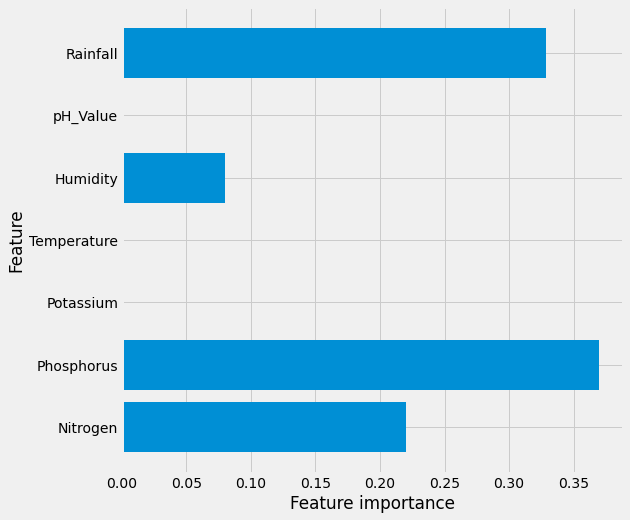

In [117]:
plot_feature_importances(D_tree)

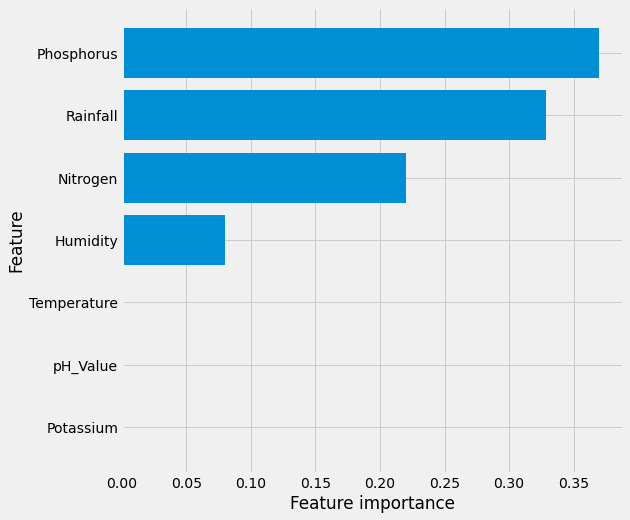

In [118]:
plotImportanceOrdered(D_tree)

In [119]:
pred = D_tree.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[ 0  0  0 50  0  0  0  0]
 [ 0 50  0  0  0  0  0  0]
 [ 0  0 86  0  0  0 14  0]
 [ 0  0  1 99  0  0  0  0]
 [ 0  0  0 33 17  0  0  0]
 [ 0  0  0  0  0 75  0  0]
 [ 0  0  6 20  0  0 48  1]
 [ 0  0  0  0  0  0  0 50]]
                                     precision    recall  f1-score   support

               ChickPea_KidneyBeans       0.00      0.00      0.00        50
                       Grapes_Apple       1.00      1.00      1.00        50
         Maize_Banana_Cotton_Coffee       0.92      0.86      0.89       100
MothBeans_MungBean_Blackgram_Lentil       0.49      0.99      0.66       100
                   PigeonPeas_Mango       1.00      0.34      0.51        50
         Pomegranate_Orange_Coconut       1.00      1.00      1.00        75
                   Rice_Papaya_Jute       0.77      0.64      0.70        75
               Watermelon_Muskmelon       0.98      1.00      0.99        50

                           accuracy                           0.77       550
           

C:\Users\alwroble\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alwroble\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alwroble\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

In [120]:
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(y_test, pred) * 100))

Testing Accuracy for Decision Tree Classifier: 77.27%


In [121]:
D_tree.score(X_train, y_train)

0.7824242424242425

In [122]:
D_tree.score(X_test, y_test)

0.7727272727272727

Decision Tree with max depth of 2

In [123]:
D_tree_2 = DecisionTreeClassifier(max_depth = 2)
D_tree_2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [124]:
D_tree.feature_importances_

array([0.22038949, 0.36952973, 0.        , 0.00211367, 0.07979087,
       0.        , 0.32817624])

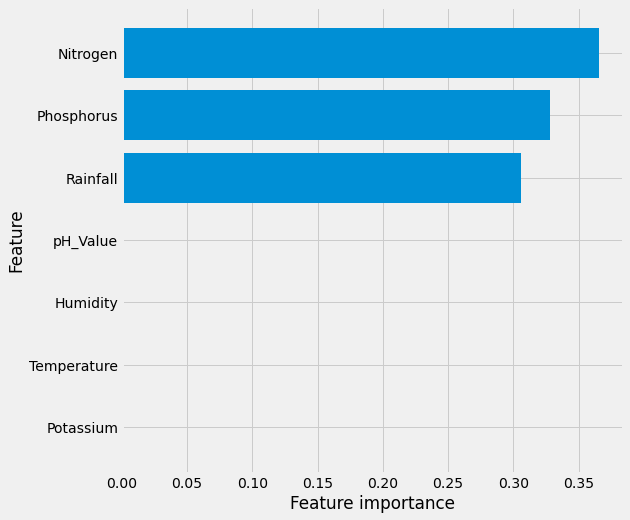

In [125]:
plotImportanceOrdered(D_tree_2)

In [126]:
pred2 = D_tree_2.predict(X_test)
print(confusion_matrix(y_test, pred2))
print(classification_report(y_test, pred2))

[[  0   0   0  50   0   0   0   0]
 [  0   0   0  50   0   0   0   0]
 [  0   0 100   0   0   0   0   0]
 [  0   0   1  99   0   0   0   0]
 [  0   0   0  33   0  17   0   0]
 [  0   0   0   0   0  75   0   0]
 [  0   0  53  20   0   0   0   2]
 [  0   0   0   0   0   0   0  50]]
                                     precision    recall  f1-score   support

               ChickPea_KidneyBeans       0.00      0.00      0.00        50
                       Grapes_Apple       0.00      0.00      0.00        50
         Maize_Banana_Cotton_Coffee       0.65      1.00      0.79       100
MothBeans_MungBean_Blackgram_Lentil       0.39      0.99      0.56       100
                   PigeonPeas_Mango       0.00      0.00      0.00        50
         Pomegranate_Orange_Coconut       0.82      1.00      0.90        75
                   Rice_Papaya_Jute       0.00      0.00      0.00        75
               Watermelon_Muskmelon       0.96      1.00      0.98        50

                        

C:\Users\alwroble\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alwroble\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alwroble\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

In [127]:
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(y_test, pred2) * 100))

Testing Accuracy for Decision Tree Classifier: 58.91%


In [128]:
# END DECISION TREES

----- Random Forest -----

In [129]:
forest = RandomForestClassifier(max_depth = 3, n_estimators=30)
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=30)

In [130]:
forest.score(X_train, y_train)

0.9624242424242424

In [131]:
forest.score(X_test, y_test)

0.96

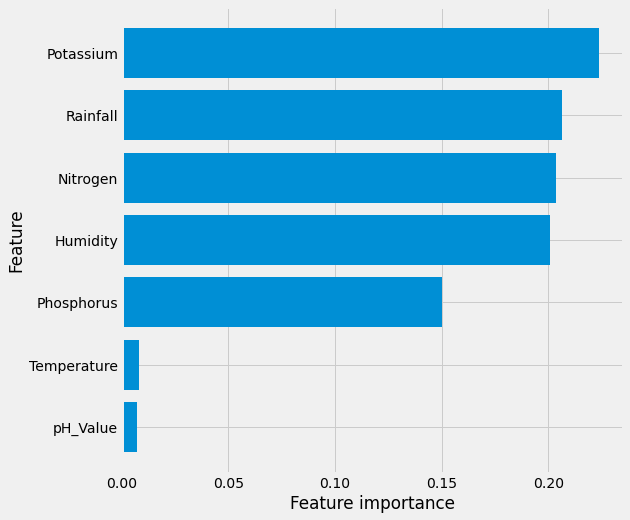

In [132]:
plotImportanceOrdered(forest)

In [133]:
pred3 = forest.predict(X_test)
print(confusion_matrix(y_test, pred3))
print(classification_report(y_test, pred3))

[[ 50   0   0   0   0   0   0   0]
 [  0  50   0   0   0   0   0   0]
 [  0   0 100   0   0   0   0   0]
 [  0   0   1  98   1   0   0   0]
 [  0   0   0   0  40  10   0   0]
 [  0   0   0   0   0  75   0   0]
 [  0   0   0   3   0   5  65   2]
 [  0   0   0   0   0   0   0  50]]
                                     precision    recall  f1-score   support

               ChickPea_KidneyBeans       1.00      1.00      1.00        50
                       Grapes_Apple       1.00      1.00      1.00        50
         Maize_Banana_Cotton_Coffee       0.99      1.00      1.00       100
MothBeans_MungBean_Blackgram_Lentil       0.97      0.98      0.98       100
                   PigeonPeas_Mango       0.98      0.80      0.88        50
         Pomegranate_Orange_Coconut       0.83      1.00      0.91        75
                   Rice_Papaya_Jute       1.00      0.87      0.93        75
               Watermelon_Muskmelon       0.96      1.00      0.98        50

                        

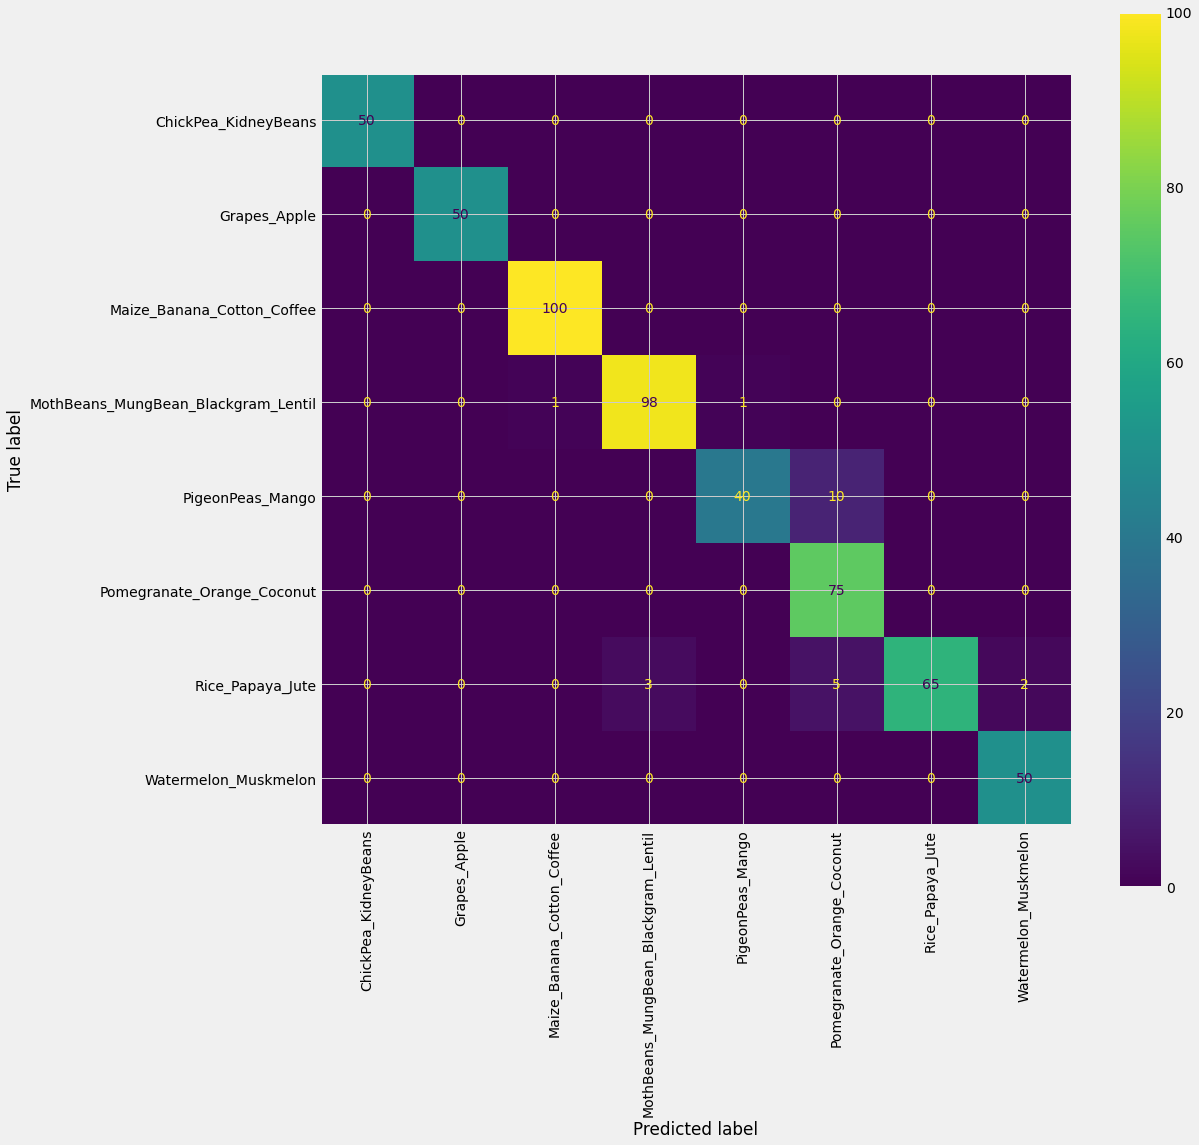

In [134]:
fig, ax = plt.subplots(figsize=(15,15))
# ConfusionMatrixDisplay(confusion_matrix(y_test, pred3))
ConfusionMatrixDisplay.from_estimator(estimator=forest,
                     X=X_test,
                     y=y_test,
                     ax = ax,
                     xticks_rotation='vertical')

In [135]:
df_tree_1 = forest.estimators_[0]

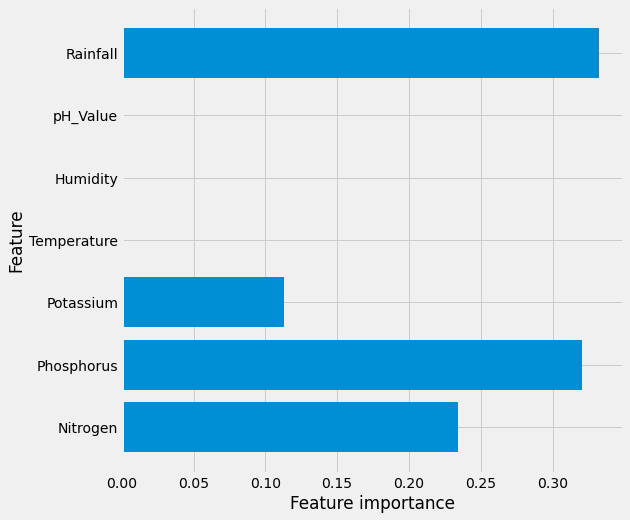

In [136]:
plot_feature_importances(df_tree_1)

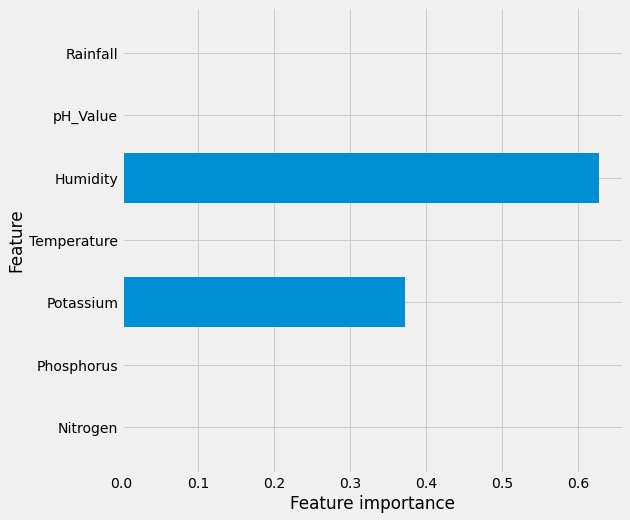

In [137]:
df_tree_2 = forest.estimators_[1]
plot_feature_importances(df_tree_2)

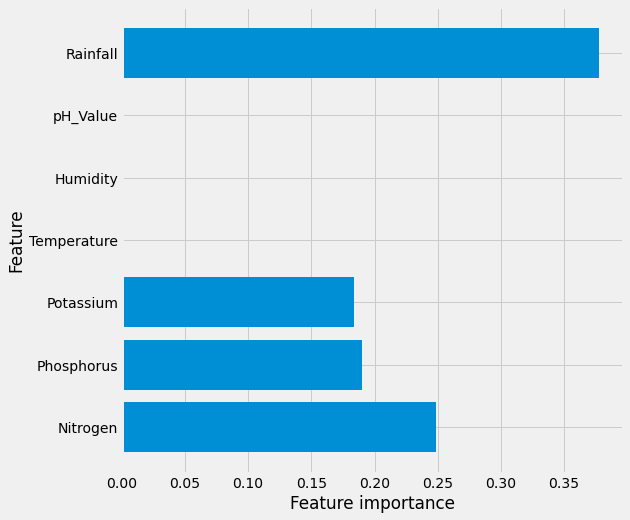

In [138]:
df_tree_3 = forest.estimators_[2]
plot_feature_importances(df_tree_3)

In [139]:
# WITHOUT CLUSTERING

In [140]:
df = pd.read_csv("../../Data/Crop_Recommendation.csv", index_col=0)
df.head()

,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
Nitrogen,,,,,,,
90,42,43,20.879744,82.002744,6.502985,202.935536,Rice
85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
60,55,44,23.004459,82.320763,7.840207,263.964248,Rice
74,35,40,26.491096,80.158363,6.980401,242.864034,Rice
78,42,42,20.130175,81.604873,7.628473,262.717340,Rice


In [141]:
target = df.Crop
df = df.drop("Crop", axis=1)

In [142]:
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.25, random_state=43, stratify=target)

In [143]:
forest = RandomForestClassifier(max_depth = 3, n_estimators=30)
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=30)

In [144]:
forest.score(X_train, y_train)

0.8315151515151515

In [145]:
forest.score(X_test, y_test)

0.8272727272727273

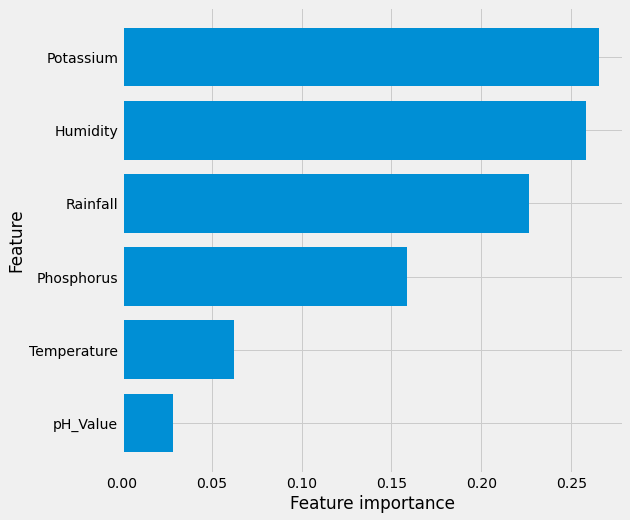

In [146]:
plotImportanceOrdered(forest)

In [147]:
pred3 = forest.predict(X_test)
print(confusion_matrix(y_test, pred3))
print(classification_report(y_test, pred3))

[[25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0 22  0  0  0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 20  0  0  0  0  0  1  4  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  7  0  0  0  0  0  0  0  0  0  0  0 18  0]
 [ 0  0  0  0  0  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  6  0  0  0  0  0  0  0  1 18  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 24  0  0  0  0  0  1  0  0  0]
 [ 0  0  7  0  0  0  0  0  0  0  2  6  2  0  8  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

C:\Users\alwroble\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alwroble\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alwroble\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

In [148]:
# fig, ax = plt.subplots(figsize=(15,15))
# plot_confusion_matrix(estimator=forest,
#                      X=X_test,
#                      y_true=y_test,
#                      ax = ax,
#                      xticks_rotation='vertical')

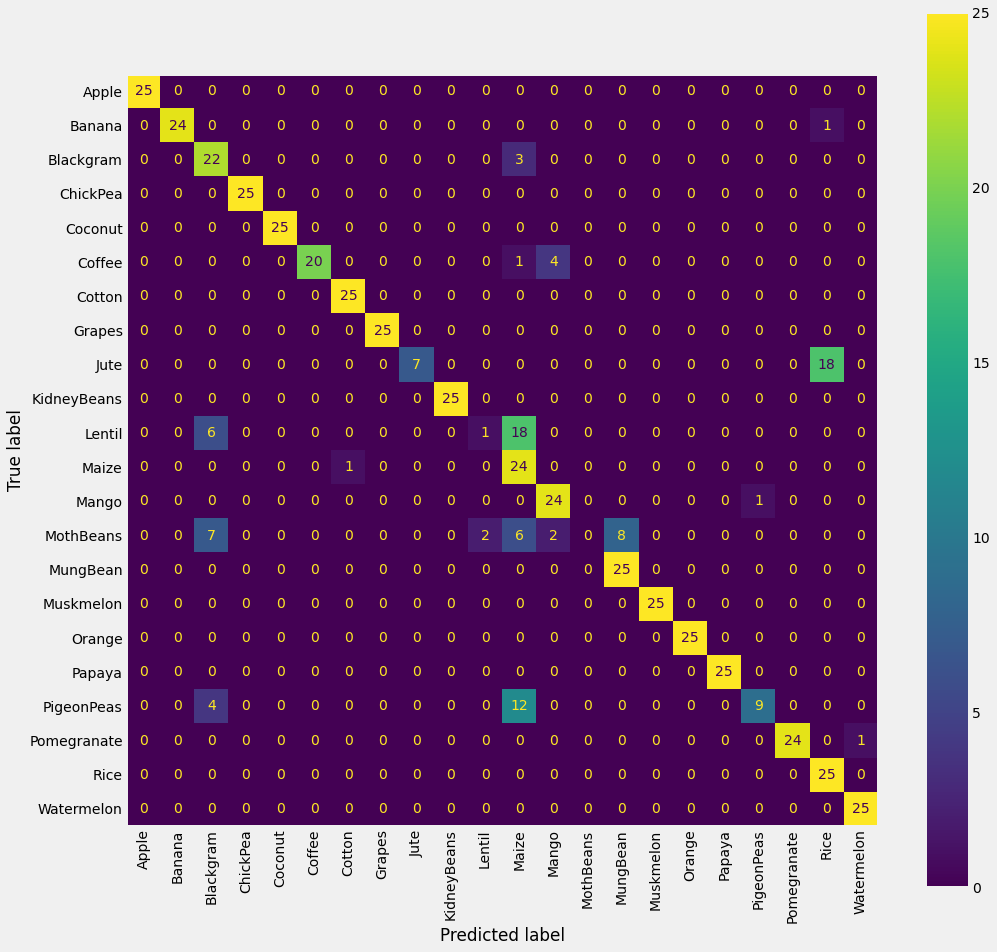

In [152]:
fig, ax = plt.subplots(figsize=(15,15))
# ConfusionMatrixDisplay(confusion_matrix(y_test, pred3))
ax.grid(False)
ConfusionMatrixDisplay.from_estimator(estimator=forest,
                     X=X_test,
                     y=y_test,
                     ax = ax,
                     xticks_rotation='vertical')